# Perform time series forecasting using XGBoost

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error

from skopt import BayesSearchCV

from joblib import dump
from joblib import load

In [11]:
df = pd.read_csv("./data/processed/mastercard_processed.csv", parse_dates = True, index_col = ["Date"])
df.head()

,Open,Volume,Close,month,day,quarter,lag_1,lag_2,MA,M_STD
Date,,,,,,,,,,
2006-06-29,4.367592,14470000.0,4.46527,6,3,2,4.368524,4.401083,4.325699,0.125787
2006-06-30,4.432710,25964000.0,4.46527,6,4,2,4.465270,4.368524,4.338103,0.120293
2006-07-01,4.432710,25964000.0,4.46527,7,5,3,4.465270,4.465270,4.347592,0.118657
2006-07-02,4.432710,25964000.0,4.46527,7,6,3,4.465270,4.465270,4.349111,0.119898
2006-07-03,4.455966,7029000.0,4.40015,7,0,3,4.465270,4.465270,4.352243,0.121711


In [12]:
# scale data
scaler = StandardScaler()
cols_to_standardize = ['Open', "Volume", "lag_1", "lag_2", "MA", "M_STD"]
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

## Modelling

In [13]:
# split data into last 20 days to predict as test data
df_train = df.iloc[:-300]
df_val = df.iloc[-300:-150]
df_test = df.iloc[-150:]

X_train = df_train[["Open", "Volume", "month", "day", "quarter", "lag_1", "lag_2", "MA", "M_STD"]]
y_train = df_train[["Close"]]

X_val = df_val[["Open", "Volume", "month", "day", "quarter", "lag_1", "lag_2", "MA", "M_STD"]]
y_val = df_val[["Close"]]

X_test = df_test[["Open", "Volume", "month", "day", "quarter", "lag_1", "lag_2", "MA", "M_STD"]]
y_test = df_test[["Close"]]

In [16]:
model = XGBRegressor(objective = "reg:squarederror", random_state = 42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [17]:
# check RMSE for training data
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)

print(f"Root mean squared error is: {np.sqrt(mse) : .2f}")

Root mean squared error is:  0.84


In [18]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)

print(f"Root mean squared error is: {np.sqrt(mse) : .2f}")

Root mean squared error is:  18.59


We can see that RMSE for train data is much smaller than that of the validation data

In [19]:
y_pred

array([467.7578 , 458.9032 , 465.29947, 461.59805, 466.61914, 460.67627,
       459.60956, 459.26038, 456.70297, 455.66193, 457.8099 , 460.83533,
       456.28674, 454.96237, 455.74463, 451.18475, 454.6217 , 455.21527,
       456.40158, 449.7318 , 448.74542, 445.83932, 442.92606, 441.9127 ,
       443.78818, 442.33218, 439.78888, 439.30112, 439.23938, 444.56998,
       442.8038 , 443.4042 , 443.296  , 444.90356, 446.465  , 445.16153,
       442.5347 , 441.99277, 444.45572, 446.00314, 445.3156 , 445.52402,
       445.52402, 443.6769 , 438.90387, 445.01105, 443.02466, 442.55554,
       444.1758 , 444.2577 , 445.1602 , 446.1687 , 444.54062, 447.03665,
       444.3746 , 444.57278, 443.15076, 444.6482 , 441.94913, 455.9821 ,
       458.38647, 460.9321 , 460.71643, 460.71643, 456.07852, 456.22235,
       456.83295, 457.5553 , 457.14362, 455.8408 , 457.1621 , 456.95123,
       457.7407 , 457.04697, 459.56375, 460.514  , 461.32965, 461.56607,
       455.7509 , 460.97964, 458.63998, 458.11285, 

Plot the predicted and actual data

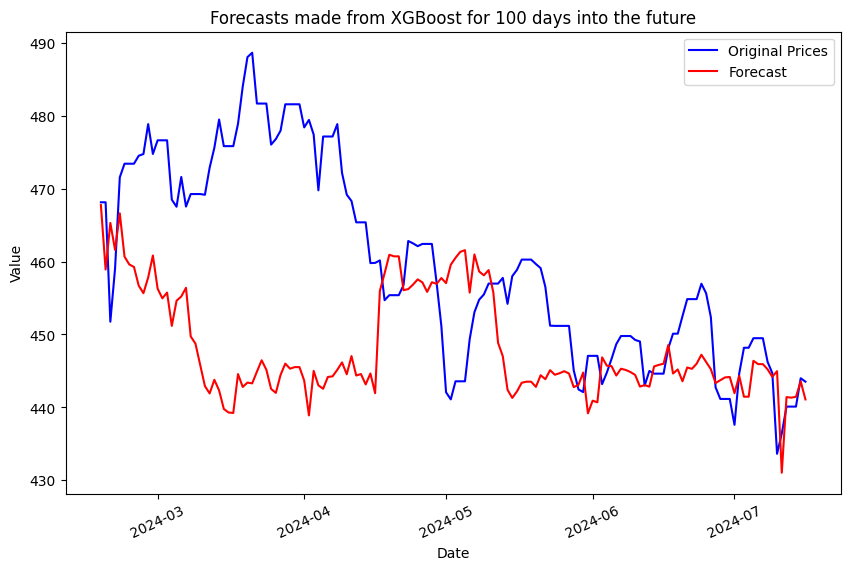

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(X_val.index, y_val, label = "Original Prices", color = "blue")
plt.plot(X_val.index, y_pred, label = "Forecast", color = "red")

# Add labels and title
plt.title("Forecasts made from XGBoost for 100 days into the future")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation = 25)
plt.legend()

# Show the plot
plt.show()

## Save the model

In [ ]:
# dump(model, "./models/XGBRegressor.pkl")

['./models/XGBRegressor.pkl']

In [16]:
# test loading of model
# test_model = load("./models/XGBRegressor.pkl")

In [18]:
# test_model.predict(X_val)

array([467.75888, 463.4218 , 461.4108 , 461.72665, 463.7311 , 460.9454 ,
       460.37997, 459.84268, 457.07047, 456.85367, 458.50522, 459.80905,
       450.18515, 449.61972, 449.61972, 447.28873, 449.05457, 450.2285 ,
       451.25412, 443.24194, 442.6765 , 438.25726, 438.7055 , 437.9584 ,
       441.18692, 440.8633 , 440.92798, 440.9721 , 440.9721 , 441.1447 ,
       440.45187, 441.47488, 440.53503, 444.1882 , 444.47842, 443.9573 ,
       439.52454, 439.59595, 443.38544, 443.97635, 443.7741 , 443.41724,
       443.40793, 442.70554, 437.17407, 444.7557 , 443.45053, 442.0497 ,
       441.8088 , 441.65225, 443.21048, 445.14517, 441.59985, 446.55078,
       443.43622, 442.63348, 442.11237, 441.08377, 438.5098 , 450.95938,
       452.0908 , 453.64615, 453.7219 , 453.7219 , 451.34836, 450.41412,
       451.45908, 452.00156, 452.0238 , 451.29202, 451.48157, 451.5379 ,
       452.67923, 452.83765, 451.3521 , 453.05435, 454.4246 , 453.98456,
       452.38574, 457.06152, 456.589  , 452.23172, 

Our model can be saved and loaded successfully.

## Tune the XGB model

In [21]:
search_space = {
    'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
    'min_split_loss': [2, 5, 10, 20, 30],
    'max_depth': [5, 10, 15, 20, 30],
    'reg_lambda': [1, 2, 5, 10],
    'reg_alpha': [1, 2, 3, 10]
}

best_params = {
    "eta": 0,
    "min_split_loss": 0,
    "max_depth": 0,
    "reg_lambda": 0,
    "reg_alpha": 0
}

best_model = XGBRegressor(random_state = 42)

best_rmse = 10000000

scores = []

i = 0
j = 0
stop = False

for e in search_space['eta']:
    if stop: break
    for sl in search_space['min_split_loss']:
        if stop: break
        for max_d in search_space['max_depth']:
            if stop: break
            for l in search_space['reg_lambda']:
                if stop: break
                for alpha in search_space['reg_alpha']:
                    model = XGBRegressor(
                        objective = "reg:squarederror",
                        eta = e,
                        min_split_loss = sl,
                        max_depth = max_d,
                        reg_lambda = l,
                        reg_alpha = alpha,
                        random_state = 42
                    )

                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_val)
                    mse = mean_squared_error(y_val, y_pred)

                    scores.append(np.sqrt(mse))

                    # update parameters if get better RMSE
                    if np.sqrt(mse) < best_rmse:
                        print(f"New best RMSE of validation set is: {np.sqrt(mse)}")
                        best_rmse = np.sqrt(mse)
                        best_params['eta'] = e
                        best_params['min_split_loss'] = sl
                        best_params['max_depth'] = max_d
                        best_params['reg_lambda'] = l
                        best_params['reg_alpha'] = alpha

                        print(best_params)

                        best_model = model

                    # implement early stopping if after 10 rounds, no more significant improvements in rmse
                    if len(scores) > 1 and (scores[i] > scores[i - 1] or abs(scores[i] - scores[i - 1]) < 0.1):
                        j += 1
                    else:
                        j = 0

                    if j == 10:
                        stop = True
                        break
                    
                    i += 1

New best RMSE of validation set is: 20.23524601206872
{'eta': 0.1, 'min_split_loss': 2, 'max_depth': 5, 'reg_lambda': 1, 'reg_alpha': 1}
New best RMSE of validation set is: 19.4583240238974
{'eta': 0.1, 'min_split_loss': 2, 'max_depth': 5, 'reg_lambda': 1, 'reg_alpha': 2}
New best RMSE of validation set is: 18.968980246111247
{'eta': 0.1, 'min_split_loss': 2, 'max_depth': 5, 'reg_lambda': 1, 'reg_alpha': 3}
New best RMSE of validation set is: 18.55274814328756
{'eta': 0.1, 'min_split_loss': 2, 'max_depth': 10, 'reg_lambda': 5, 'reg_alpha': 1}
New best RMSE of validation set is: 18.46411193776672
{'eta': 0.1, 'min_split_loss': 2, 'max_depth': 15, 'reg_lambda': 5, 'reg_alpha': 1}
New best RMSE of validation set is: 17.952796256607826
{'eta': 0.1, 'min_split_loss': 2, 'max_depth': 15, 'reg_lambda': 10, 'reg_alpha': 1}
New best RMSE of validation set is: 17.559576926844393
{'eta': 0.1, 'min_split_loss': 2, 'max_depth': 15, 'reg_lambda': 10, 'reg_alpha': 2}
New best RMSE of validation set i

In [22]:
best_params

{'eta': 0.4,
 'min_split_loss': 2,
 'max_depth': 20,
 'reg_lambda': 5,
 'reg_alpha': 2}

In [24]:
best_rmse

np.float64(14.646333602485878)

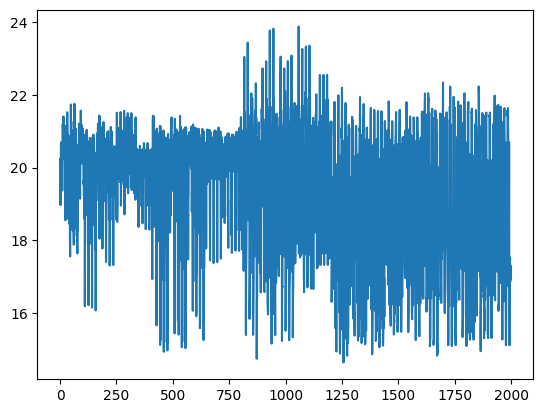

In [23]:
# plot how rmse changes
plt.plot(scores)

## Evaluate on test set

In [26]:
best_model = XGBRegressor(
    random_state = 42,
    **best_params
)

X_train = pd.concat([X_train, X_val], axis = 0)
y_train = pd.concat([y_train, y_val], axis = 0)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best root mean squared error is: {np.sqrt(mse) : .2f}")

Best root mean squared error is:  30.43


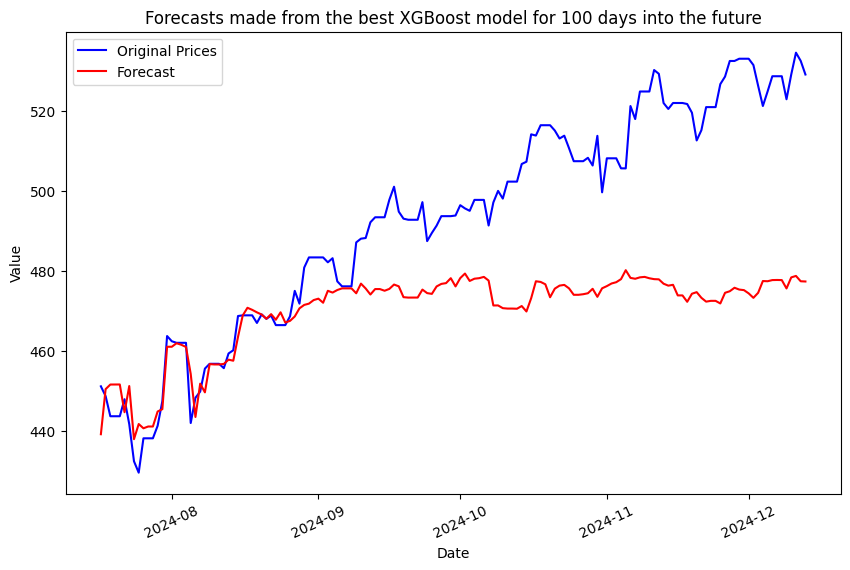

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label = "Original Prices", color = "blue")
plt.plot(X_test.index, y_pred, label = "Forecast", color = "red")

# Add labels and title
plt.title("Forecasts made from the best XGBoost model for 100 days into the future")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation = 25)
plt.legend()

# Show the plot
plt.show()

## Save the best XGB model

In [28]:
dump(best_model, "./models/best_XGBRegressor_v1.pkl")

['./models/best_XGBRegressor_v1.pkl']